# Graphs to evaluate change in CO2 emissions from food imports over the years

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

trade_mx = pd.read_csv(r"..\data\trade_matrix_carbon_footprint_v4.csv")
country_df = pd.read_csv(r"..\data\country_matrix_v4_final.csv")
items = pd.read_csv(r"..\data\food_codes_categorized_final.csv", encoding="ISO-8859-1")

country_df['key'] = country_df['country_from_code'].astype(str) + '-' + country_df['country_to_code'].astype(str)
trade_mx['key'] = trade_mx['Reporter Country Code'].astype(str) + '-' + trade_mx['Partner Country Code'].astype(str)

In [13]:
items = items.dropna(subset='food_type')

In [14]:
cols_to_keep_trade = ['Reporter Country Code', 'Item Code', 'Year', 'kg_CO2eq_tonne-km', 'key']

In [15]:
full_trade_mx = trade_mx[cols_to_keep_trade].merge(country_df[["country_from", "continent_from", "key"]], on='key', how='left')

In [16]:
full_trade_mx = full_trade_mx.merge(items, left_on="Item Code", right_on="Item_Code", how='left')

In [19]:
full_trade_mx.drop(columns=['key', 'Reporter Country Code', 'Item Code'], inplace=True)

## Plot with a sample of full matrix

In [33]:
df = full_trade_mx.sample(n=2000000)

In [34]:
df.head()

,Year,kg_CO2eq_tonne-km,country_from,continent_from,Item_Code,Item,conservation,diet,food_type
5367116,2012,5.376403e+03,finland,europe,537,Plums; dried,Ambient,vegan,fruit/vegetable
3872050,2016,7.856850e+04,kuwait,asia,1080,Meat of turkeys; fresh or chilled,Chilled,carnivore,meat
1538936,2013,1.571660e+04,taiwan,asia,885,Cream; fresh,Chilled,vegetarian,dairy
5572085,2005,5.723350e+06,croatia,europe,507,Pomelos and grapefruits,Fresh,vegan,fruit/vegetable
413894,2007,2.595325e+05,australia,oceania,623,Fruit prepared n.e.c.,Ambient,vegan,fruit/vegetable


### by continent - error is because year data

<Axes: xlabel='Year', ylabel='kg_CO2eq_tonne-km'>

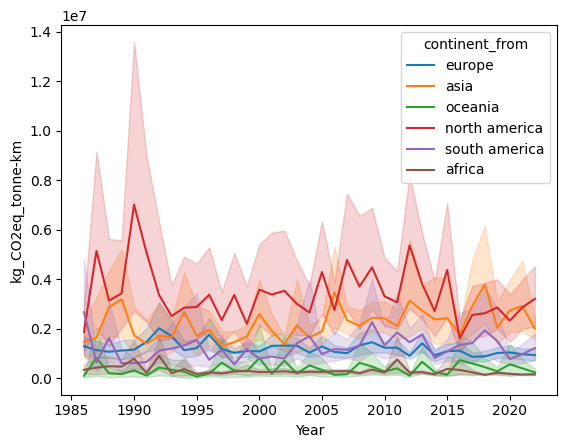

In [35]:
sns.lineplot(data=df, x='Year', y='kg_CO2eq_tonne-km', hue='continent_from')
#plt.yscale('log')
#plt.show()

### By continent sum()

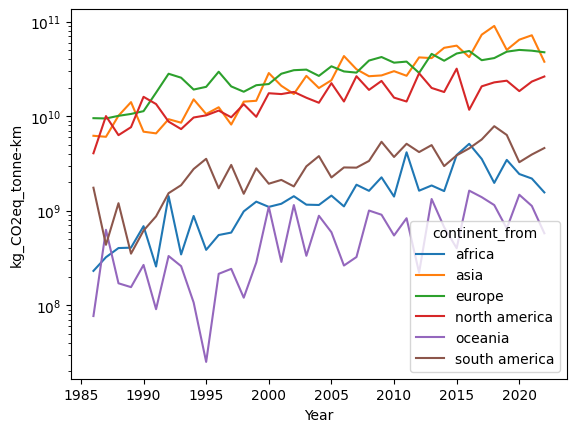

In [46]:
data = df.groupby(['Year', 'continent_from'])['kg_CO2eq_tonne-km'].sum().reset_index()

sns.lineplot(data=data, x='Year', y='kg_CO2eq_tonne-km', hue='continent_from')
plt.yscale('log')
plt.show()

## By food type sum()

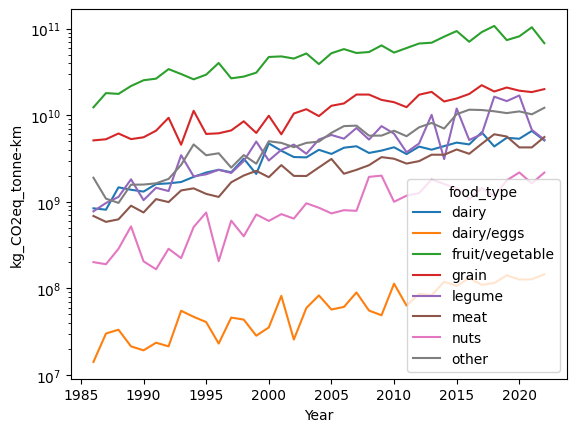

In [47]:
data = df.groupby(['Year', 'food_type'])['kg_CO2eq_tonne-km'].sum().reset_index()

sns.lineplot(data=data, x='Year', y='kg_CO2eq_tonne-km', hue='food_type')
plt.yscale('log')
plt.show()

### By diet

<Axes: xlabel='Year', ylabel='kg_CO2eq_tonne-km'>

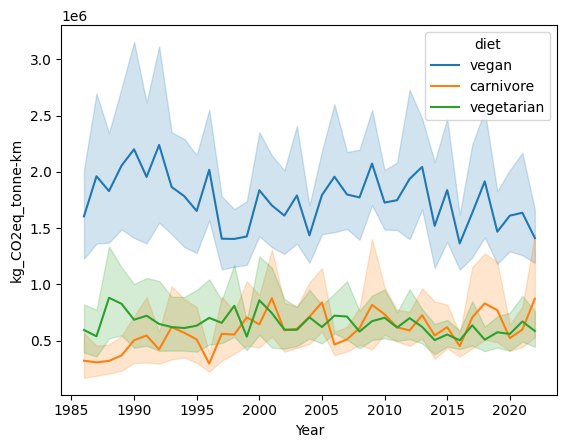

In [37]:
sns.lineplot(data=df, x='Year', y='kg_CO2eq_tonne-km', hue='diet')

### Top importing countries

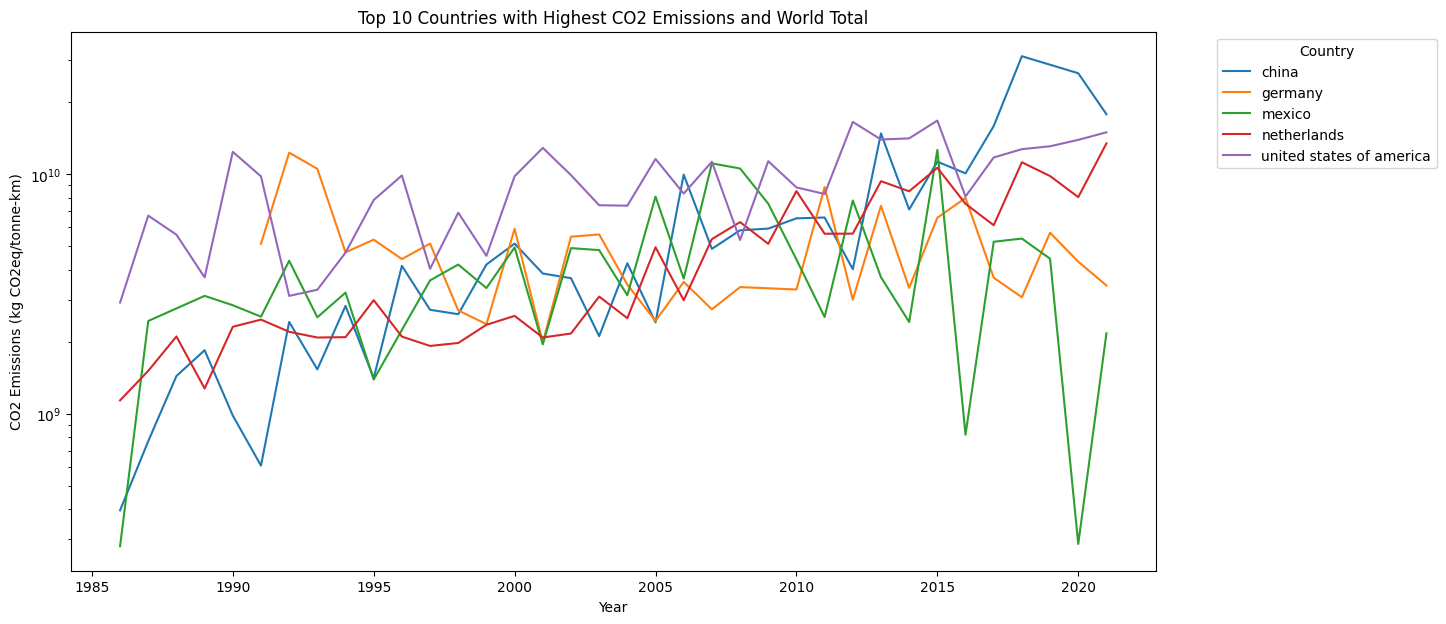

In [67]:
# Group by country and year
grouped_df = df.groupby(['country_from', 'Year'])['kg_CO2eq_tonne-km'].sum().reset_index()

# Find the top 10 countries with the highest total emissions
top_countries = (grouped_df.groupby('country_from')['kg_CO2eq_tonne-km']
                 .sum().nlargest(6).index)

# Filter the data to include only the top 10 countries and world
filtered_df = grouped_df[grouped_df['country_from'].isin(top_countries)]

#Drop Russia data in 2022 cause it is not ok
filtered_df = filtered_df.query("country_from != 'russia' and Year != 2022")

# Create the line plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=filtered_df, x='Year', y='kg_CO2eq_tonne-km', hue='country_from')

# Customize the plot
plt.title('Top 10 Countries with Highest CO2 Emissions and World Total')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kg CO2eq/tonne-km)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yscale('log')
plt.show()

### World total

In [68]:
world_data = df.groupby('Year')['kg_CO2eq_tonne-km'].sum().reset_index()

Text(0.5, 1.0, 'World Total CO2 Emissions from Food Imports')

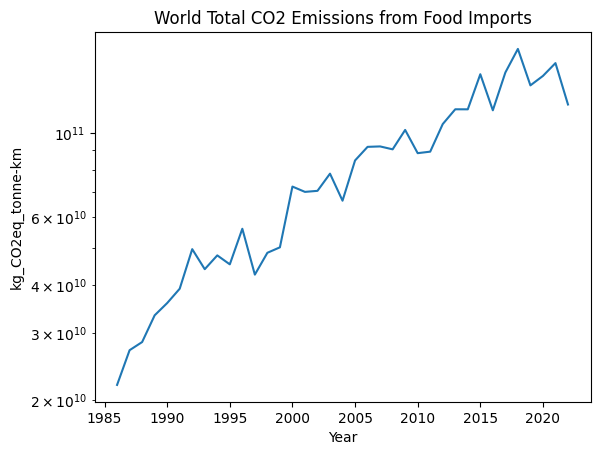

In [72]:
sns.lineplot(data=world_data, x="Year", y="kg_CO2eq_tonne-km")
plt.yscale('log')
plt.title('World Total CO2 Emissions from Food Imports')